# Домашнее задание 

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных. 

Мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/00240/. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [21]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn.cluster import KMeans, AgglomerativeClustering, BisectingKMeans, MiniBatchKMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure

RANDOM_STATE = 179

C:\Users\Machenike\AppData\Local\Temp\ipykernel_4796\3487719211.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])


In [22]:
X_train = np.loadtxt("X_train.txt")
y_train = np.loadtxt("y_train.txt").astype(int)

X_test = np.loadtxt("X_test.txt")
y_test = np.loadtxt("y_test.txt").astype(int)

Для кластеризации нам не нужен вектор ответов. Объедините обучающую и тестовую выборки.

In [23]:
X = np.append(X_train, X_test, axis=0)
y = np.append(y_train, y_test, axis=0)

In [24]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

Отмасштабируйте выборку с помощью StandardScaler.

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

In [26]:
pca = PCA(n_components=0.9, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

Визуализируйте данные в проекции на первые две главные компоненты.

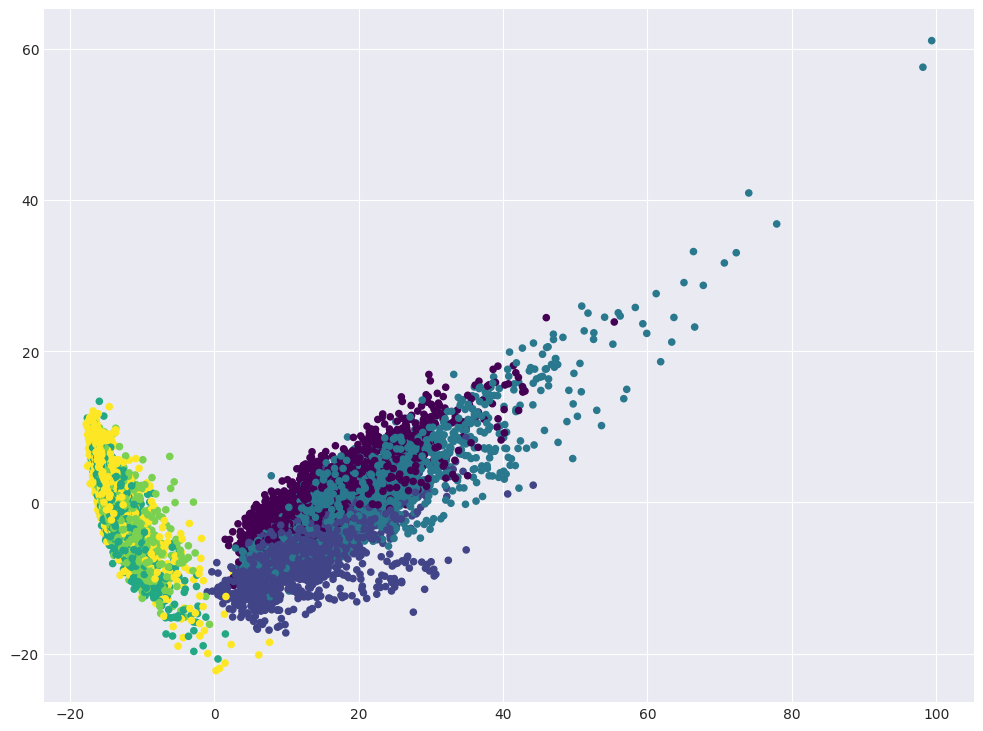

In [27]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=20, cmap='viridis')

Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов).

Параметры:

n_clusters = n_classes (число уникальных меток целевого класса)

n_init = 100

random_state = RANDOM_STATE (для воспроизводимости результата)

In [28]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
print(list(kmeans.labels_))

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 2, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

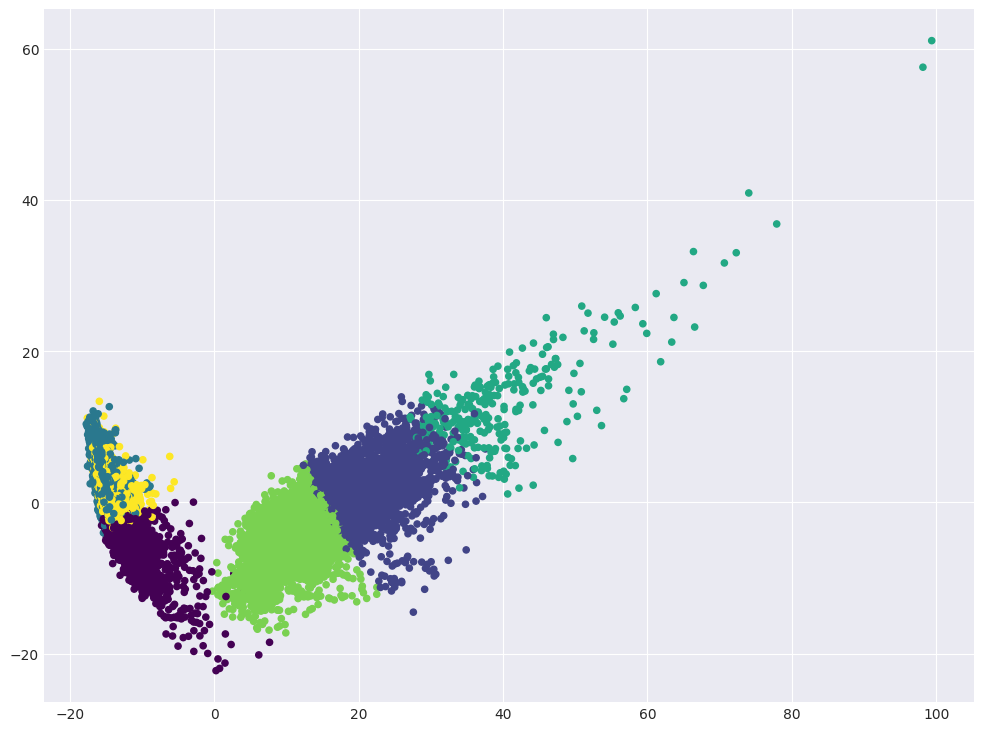

In [29]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, s=20, cmap='viridis')

Выведите на экран значения метрик качества кластеризации

In [30]:
print(adjusted_rand_score(y, kmeans.labels_))
print(adjusted_mutual_info_score(y, kmeans.labels_))
print(homogeneity_completeness_v_measure(y, kmeans.labels_))

0.4198505672500135
0.5597887573953361
(0.5407020839952051, 0.580939768981305, 0.5600991848339363)


Теперь попробуем сделать кластеризацию с помощью AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [31]:
ag = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X_pca)

Выведите метрики качества для полученного разбиения на кластеры. Сравните с kmeans. Запишите выводы!

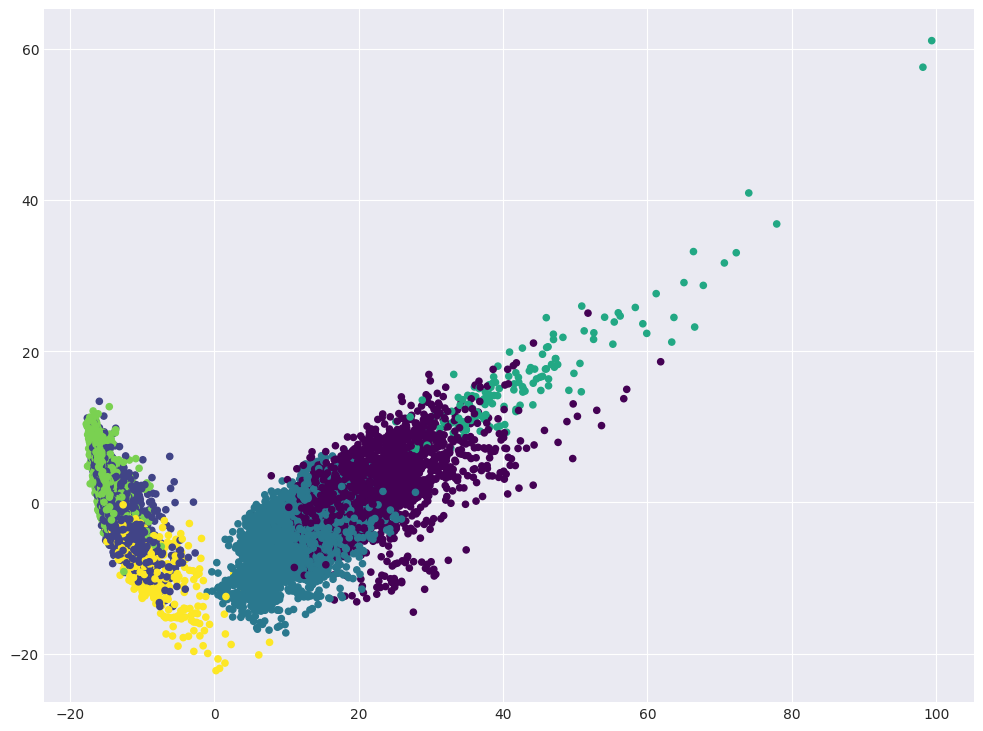

In [32]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=ag.labels_, s=20, cmap='viridis')

In [33]:
print(adjusted_rand_score(y, ag.labels_))
print(adjusted_mutual_info_score(y, ag.labels_))
print(homogeneity_completeness_v_measure(y, ag.labels_))

0.49362763373004886
0.6215079901279066
(0.5779071626156045, 0.6728743591901729, 0.6217855076000528)


И по метрикам, и по картинке глазами видно, что ag справляется лучше, но не сильно.

Попробуйте применить другие методы кластеризации из sklearn. Также вычислите метрики качества и сделайте вывод о том, какой метод сработал лучше.

In [34]:
bkm = BisectingKMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE).fit(X_pca)

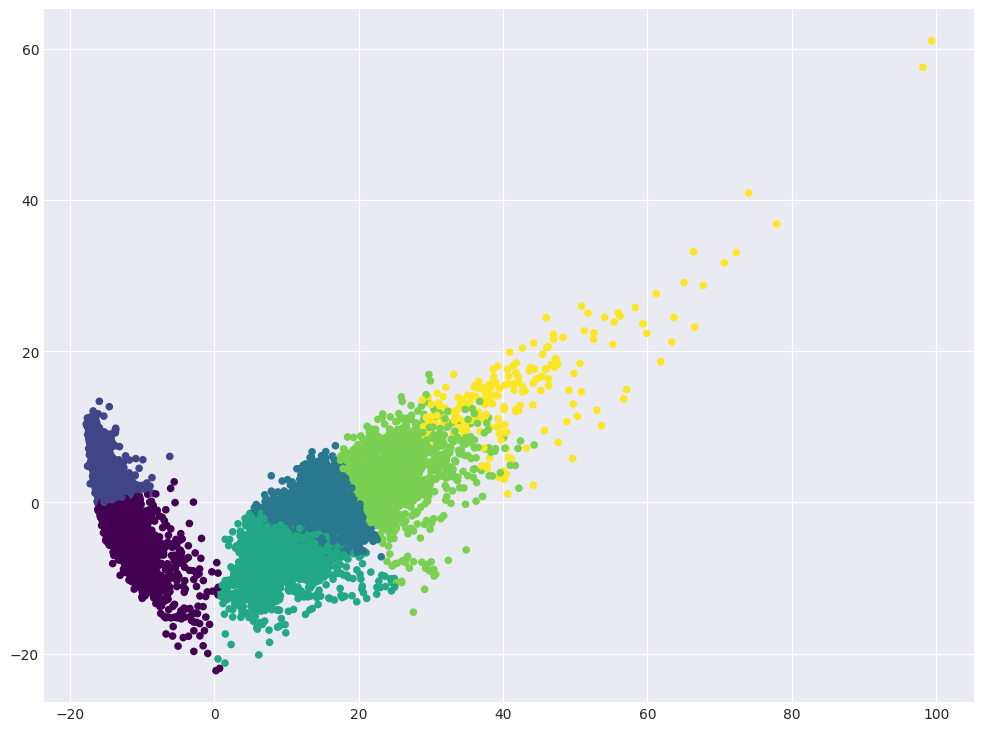

In [35]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=bkm.labels_, s=20, cmap='viridis')

In [36]:
print(adjusted_rand_score(y, bkm.labels_))
print(adjusted_mutual_info_score(y, bkm.labels_))
print(homogeneity_completeness_v_measure(y, bkm.labels_))

0.2936659008908553
0.45807097910533223
(0.43636432799933905, 0.4829098267883073, 0.4584587110456393)


In [37]:
mbkm = MiniBatchKMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE).fit(X_pca)

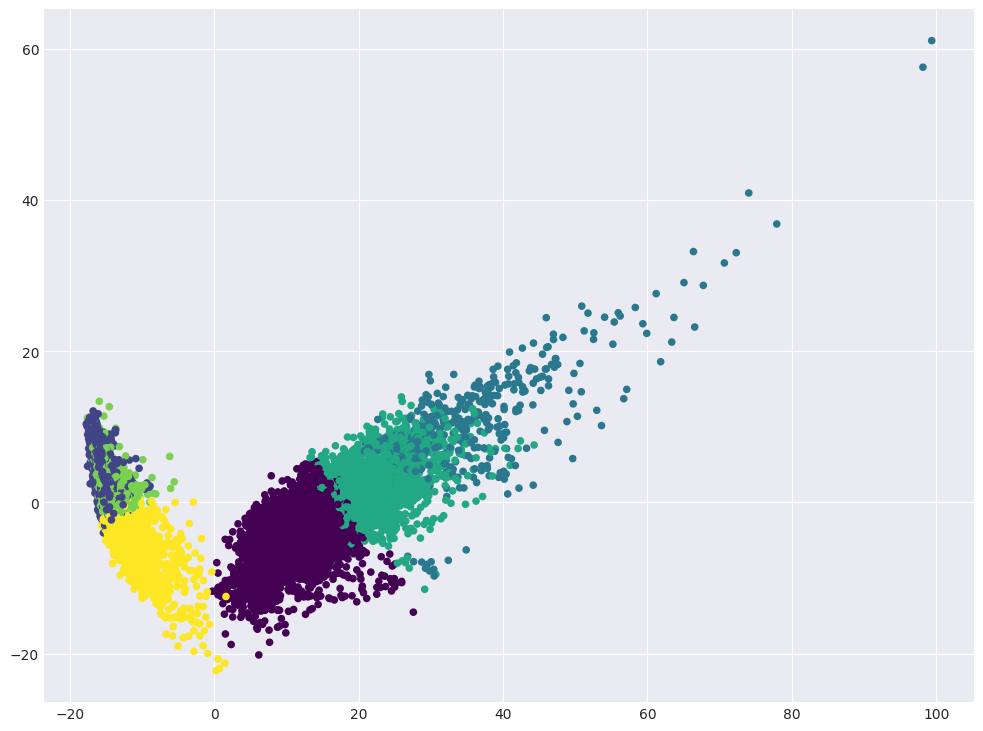

In [38]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=mbkm.labels_, s=20, cmap='viridis')

In [39]:
print(adjusted_rand_score(y, mbkm.labels_))
print(adjusted_mutual_info_score(y, mbkm.labels_))
print(homogeneity_completeness_v_measure(y, mbkm.labels_))

0.4102892093647974
0.5531517667389219
(0.5369045103928646, 0.571080206389837, 0.5534652851478367)


Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* в каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

Если посмотреть на оригинальные данные, можно заметить, что они хорошо делятся на две половины. Вероятно, одна — стоять, сидеть и лежать, а вторая — ходить и ходить по лестнице. Похоже, что из-за большой схожести видов активности в этих группах кластеризация получается только приемлемого, а не хорошего качества.